# 1.自动生成语言

In [4]:
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article => 一个 | 这个
noun => 女人 | 篮球 | 桌子 | 小猫
verb => 看着 | 坐着 | 听着 | 看见
Adj => 蓝色的 | 好看的 | 小小的
"""

In [5]:
import random

In [6]:
def adj(): return random.choice('蓝色的 | 好看的 | 小小的'.split('|')).split()[0]

Q1. .split()[0]去掉，我试过功能一样

In [7]:
def adj_star(): 
    return random.choice([lambda : '', lambda : adj() + adj_star()])()

Q2. 后面的括号()是用来干什么的？
答：这个括号应该是为了保证函数有执行，没有括号，返回值是函数本身.

In [8]:
adj_star()

'小小的'

### 问题在于：如果我们更换了语法，所有写过的程序，都需要重新写。

In [9]:
adj_grammar = """
Adj* => null | Adj Adj*
Adj => 蓝色的 | 好看的 | 小小的
"""

In [10]:
def create_grammar(grammar_str, split='=>', line_split='\n'):
    grammar = {}
    for line in grammar_str.split(line_split):
        if not line.strip(): continue
        exp, stmt = line.split(split)
        grammar[exp.strip()] = [s.split() for s in stmt.split('|')]
    return grammar

create_grammar()函数将文本转换为字典

In [11]:

def generate(gram, target):
    if target not in gram: return target
    expand = [generate(gram, t) for t in random.choice(gram[target]) ]
    return ''.join([e if e != '/n' else '\n'  for e in expand if e != 'null'])

Q3. if e != '/n' else '\n' 什么意思？

In [12]:
example_grammar = create_grammar(simple_grammar)

In [13]:
example_grammar

{'Adj': [['蓝色的'], ['好看的'], ['小小的']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'sentence': [['noun_phrase', 'verb_phrase']],
 'verb': [['看着'], ['坐着'], ['听着'], ['看见']],
 'verb_phrase': [['verb', 'noun_phrase']]}

In [14]:
generate(gram= example_grammar, target='sentence')

'一个桌子看见一个篮球'

In [15]:
#在西部世界里，一个“人类”的语言可以定义为：

human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们
寻找 = 找找 | 想找点
活动 = 乐子 |玩的
"""

#一个“接待员”的语言可以定义为

host = """
host = 寒暄 报数 询问 业务相关 结尾

寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ，
人称 = 先生 | 女士 | 小朋友
打招呼 = 您好 | 你好

报数 = 我是 数字 号 ，
数字 = 单个数字 | 数字 单个数字
单个数字 = 1| 2| 3| 4| 5| 6| 7| 8| 9

询问 = 请问你要 | 您需要

业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""

In [16]:
for i in range(20):
    print(generate(gram= create_grammar(host,split='='), target='host'))

女士，您好我是53号，请问你要打猎吗？
先生，您好我是46号，您需要打猎吗？
女士，你好我是4号，您需要打牌吗？
女士，你好我是37532号，您需要赌博吗？
你好我是2号，您需要喝酒吗？
你好我是68号，您需要喝酒吗？
你好我是7号，您需要打牌吗？
你好我是7号，您需要喝酒吗？
您好我是5号，请问你要赌博吗？
您好我是44943号，请问你要喝酒吗？
您好我是1号，您需要打猎吗？
女士，你好我是62号，您需要打猎吗？
您好我是1号，请问你要赌博吗？
小朋友，您好我是67号，您需要打猎吗？
您好我是7号，请问你要打牌吗？
先生，你好我是29号，您需要喝酒吗？
您好我是1号，请问你要赌博吗？
您好我是4号，您需要打牌吗？
你好我是773号，您需要赌博吗？
先生，您好我是5号，您需要打猎吗？


## Data Driven
我们的目标是，希望做一个程序，然后，当输入的数据变化的时候，我们的程序不用重写，通用型。
我们希望找到一个方法，当输入变了，我们的这个方法不用变，从而实现自动化解决问题。

# 2. 语言模型 
## 判断生成的句子的可信度

$ language\_module(string)=probability(string)∈ [0,1] $
$ Pro(w_1w_2w_3)=P(w_1|w_2w_3)*P(w_2|w_3)*P(w_3) $

In [17]:
import random
random.choice(range(100))

21

In [18]:
filename = 'F:/NLP_course/lesson1/datasource/export_sql_1558435/sqlResult_1558435.csv'

In [19]:
import pandas as pd
content = pd.read_csv(filename, encoding='gb18030')

Q4. 下面的.head()读取的是文件的哪些地方？
答：.head()会将文件中的第一行看作列名，并默认输出之后的五行，在head后面的括号里面直接写你想要输出的行数也行，比如2，10，100之类的。

In [20]:
content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [21]:
articles = content['content'].tolist()

In [22]:
len(articles)

89611

In [23]:
import re 
#正则表达式模块

def token(string):
    return re.findall('\w+',string)
#“w”在正则里面代表匹配从小写a到z,大写A到Z，数字0到9

In [24]:
from collections import Counter
import jieba
with_jieba_cut = Counter(jieba.cut(articles[110]))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\1\AppData\Local\Temp\jieba.cache
Loading model cost 0.852 seconds.
Prefix dict has been built succesfully.


In [25]:
with_jieba_cut.most_common()[:10]

[('，', 88),
 ('的', 73),
 ('。', 39),
 ('\r\n', 27),
 ('了', 20),
 ('们', 18),
 ('工作队', 16),
 ('村民', 15),
 ('收割', 14),
 ('、', 12)]

In [26]:
token(articles[110])

['在外国名著',
 '麦田里的守望者',
 '中',
 '作者想要守护麦田里如自己内心一般纯真的孩子们',
 '而驻村干部们',
 '也在这个炎热的夏天里撸袖子上阵',
 '真正做起了村民们的',
 '麦田守望者',
 '三夏时节不等人',
 '你看到了吗',
 '不停翻涌起伏',
 '仿若铺陈至天边的金黄麦浪中',
 '那若隐若现的人影',
 '是自治区新闻出版广电局驻和田市肖尔巴格乡合尼村工作队的队员与工作队组织的青年志愿者',
 '在这个炎热的夏季',
 '他们深入田间地头',
 '帮助村民们收割小麦',
 '扛起收麦机',
 '麦田中的每个人都显得兴致勃勃',
 '一天下来就近22亩小麦收割完毕',
 '志愿者麦麦提亚森擦去满脸的汗水',
 '高兴地告诉驻村队员',
 '我们青年志愿者应该多做贡献',
 '为村里的脱贫致富出把力',
 '工作队带着我们为村里的老人服务',
 '看到那些像我爷爷奶奶一样的老人赞许感谢的目光',
 '我体会到了帮助他人的快乐',
 '自治区新闻出版广电局驻村工作队孙敏',
 '艾力依布拉音',
 '麦收时节',
 '我们在一起',
 '6月中旬的和田墨玉',
 '麦田金黄',
 '静待收割',
 '6月14日',
 '15日两天',
 '自治区高级人民法院驻和田地区墨玉县吐外特乡罕勒克艾日克村工作队与48名村民志愿者一道',
 '帮助村里29户有需要的村民进行小麦收割工作',
 '田间地头',
 '罕勒克艾日克村志愿队的红旗迎风飘扬',
 '格外醒目',
 '10余台割麦机一起轰鸣',
 '男人们在用机器收割小麦的同时',
 '几名妇女也加入到志愿队',
 '构成了一道美丽的麦收风景',
 '休息空闲',
 '工作队员和村民们坐在树荫下',
 '田埂上',
 '互相问好',
 '聊天',
 '语言交流有困难',
 '就用手势',
 '动作比划着聊天',
 '有趣地交流方式不时引来阵阵欢笑',
 '大家在一同享受丰收和喜悦',
 '也一同增进着彼此的情感和友谊',
 '自治区高级人民法院驻村工作队周春梅',
 '艾地艾木',
 '阿不拉',
 '细看稻菽千重浪',
 '6月15日',
 '自治区煤田灭火工程局的干部职工们再一次跋涉1000多公里来到了叶城县萨依巴格乡阿亚格欧尔达贝格村',
 '见到了自己的亲戚',
 '现场处处都

In [27]:
''.join(token(str(articles[1])))

'骁龙835作为唯一通过Windows10桌面平台认证的ARM处理器高通强调不会因为只考虑性能而去屏蔽掉小核心相反他们正联手微软找到一种适合桌面平台的兼顾性能和功耗的完美方案报道称微软已经拿到了一些新的源码以便Windows10更好地理解biglittle架构资料显示骁龙835作为一款集成了CPUGPU基带蓝牙WiFi的SoC比传统的Wintel方案可以节省至少30的PCB空间按计划今年Q4华硕惠普联想将首发骁龙835Win10电脑预计均是二合一形态的产品当然高通骁龙只是个开始未来也许还能见到三星Exynos联发科华为麒麟小米澎湃等进入Windows10桌面平台'

In [28]:
articles_clean = [''.join(token(str(a))) for a in articles]

In [29]:
len(articles_clean)

89611

Q5. 如何下载Github中的article_9k.txt文件

答：自己生成的，不需要下载

In [30]:
with open('F:/NLP_course/lesson1/article_9k.txt','w') as f:
    for a in articles_clean:
        f.write(a+ '\n')

In [31]:
ls

 驱动器 C 中的卷是 Win7
 卷的序列号是 483A-9143

 C:\Users\1\NLP_course\lesson1 的目录

2019/07/03  13:55    <DIR>          .
2019/07/03  13:55    <DIR>          ..
2019/07/03  01:04    <DIR>          .ipynb_checkpoints
2019/07/03  01:58        64,368,892 article_9k.txt
2019/07/03  01:22            56,287 lesson0_mathPython.ipynb
2019/07/03  13:55         2,435,695 lesson01.ipynb
               3 个文件     66,860,874 字节
               3 个目录 40,593,592,320 可用字节


In [32]:
def cut(string): return list(jieba.cut(string))

In [104]:
TOKEN = []
for i,line in enumerate((open('F:/NLP_course/lesson1/article_9k.txt'))):
    if i % 100 ==0: print(i)
    #if i>1000: break
    TOKEN += cut(line)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [105]:
from functools import reduce
from operator import add, mul
from collections import Counter
words_count=Counter(TOKEN)

In [106]:
reduce(add, [1, 2, 3, 4, 5, 8]) 
# 将所有数相加

23

In [107]:
words_count.most_common(10)

[('的', 703716),
 ('n', 382020),
 ('在', 263597),
 ('月', 189330),
 ('日', 166300),
 ('新华社', 142462),
 ('和', 134061),
 ('年', 123106),
 ('了', 121938),
 ('是', 100909)]

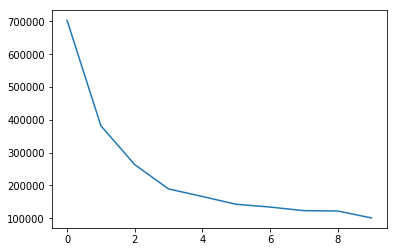

In [110]:
frequences = [f for w,f in words_count.most_common(10) ]
#f为词频数统计
x = [i for i in range(10)]
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.plot(x,frequences)


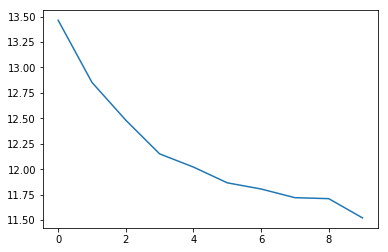

In [111]:
plt.plot(x,np.log(frequences))

In [112]:
def prob_1(word):
    return words_count[word] / len(TOKEN)

In [114]:
prob_1('我们')

0.0011341645999654677

In [115]:
TOKEN[:10]

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机']

In [116]:
TOKEN = [str(t) for t in TOKEN]

In [117]:
TOKEN_2_GRAM = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))]

In [119]:
TOKEN_2_GRAM[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [120]:
words_count_2 = Counter(TOKEN_2_GRAM)

In [121]:
def prob_2(word1, word2):
    if word1 + word2 in words_count_2:
        return words_count_2[word1+ word2]/ len(TOKEN_2_GRAM)
    else:
        return 1/ len(TOKEN_2_GRAM)

In [122]:
prob_2('本周','6')

1.702779594706671e-07

In [123]:
prob_2('本周','月')

5.6759319823555707e-08

In [125]:
prob_2('我们','在')

3.0536514065072974e-05

In [126]:
def get_probability(sentence):
    words = cut(sentence)
    sentence_pro = 1
    
    for i,word in enumerate(words[:-1]):
        next_ = words[i+1]
        probability = prob_2(word,next_)
        sentence_pro *= probability
    return sentence_pro

这样判断句子的概率的局限性：只依次使用前后两个词出现频数为概率，没考虑到前后三个词、四个词的情况

In [158]:
get_probability('小明今天抽奖抽到一台苹果手机')

1.5046504121058867e-42

In [157]:
get_probability('小明今天抽奖抽到一架波音飞机')

1.1234723077057287e-41

In [155]:
get_probability('洋葱奶昔来一杯')

1.8285698188632354e-22

In [156]:
get_probability('养乐多绿来一杯')

3.2216203868326836e-15

生成句子

In [159]:
for sen in [generate(gram = example_grammar, target='sentence') for i in range(10)]:
    print('sentence: {} with probability: {}'.format(sen, get_probability(sen)))

sentence: 一个小小的篮球坐着一个女人 with probability: 5.700879667403267e-38
sentence: 一个蓝色的桌子听着一个篮球 with probability: 6.309378976915557e-45
sentence: 一个小猫看见一个女人 with probability: 3.7363816500681494e-28
sentence: 一个篮球看着一个桌子 with probability: 1.037883791685597e-29
sentence: 一个篮球看见这个篮球 with probability: 4.151535166742388e-29
sentence: 这个小小的蓝色的小猫坐着一个小小的桌子 with probability: 3.335826080251103e-56
sentence: 这个篮球看着这个好看的蓝色的小小的蓝色的小猫 with probability: 7.352016890634807e-71
sentence: 一个蓝色的蓝色的蓝色的小猫坐着这个桌子 with probability: 1.3476591586325348e-66
sentence: 这个蓝色的小猫看着这个桌子 with probability: 6.41984175831845e-40
sentence: 这个小猫看见这个桌子 with probability: 4.151535166742388e-29


In [160]:
need_compared = [
    '今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果',
    '真事一只好看的小猫 真是一只好看的小猫',
    '今晚我去吃火锅 今晚火锅去吃我'
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = get_probability(s1), get_probability(s2)
    better = s1 if p1>p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + '{} with probability {}'.format(s1,p1))
    print('-'*4 + '{} with probability {}'.format(s2,p2))
    

今天晚上请你吃大餐，我们一起吃日料 is more possible
----今天晚上请你吃大餐，我们一起吃日料 with probability 1.8889745916921315e-66
----明天晚上请你吃大餐，我们一起吃苹果 with probability 1.5111796733537052e-66
真是一只好看的小猫 is more possible
----真事一只好看的小猫 with probability 4.5242555959271015e-34
----真是一只好看的小猫 with probability 7.970947520145384e-27
今晚我去吃火锅 is more possible
----今晚我去吃火锅 with probability 3.401139863085618e-20
----今晚火锅去吃我 with probability 5.396995716765105e-28
